In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

## Homework 1.3.1 - Pythagorean Problem

Consider three bodies of mass, $m1 = 3$, $m_2 = 4$, and $m_3 = 5$, located coordinate $(x, y)$ at $(1, 3)$, $(-2, -1)$ and $(1, -1)$ respectively. All are initially at rest. The interaction between particles are given by Newton's second law of motion and Newton's gravitational law:

$${{\vec F}_i} = {m_i}{a_i} =  - G\sum\limits_{i \ne j} {{m_i}{m_j}\frac{{{{\vec r}_i} - {{\vec r}_j}}}{{{{\left| {{{\vec r}_i} - {{\vec r}_j}} \right|}^3}}}} $$

Using $G = 4 \pi^{2}$, investigate the motion of the particles from $t = 0$ to $t = 10$

$$
    {m_i}{a_i} = - G\sum\limits_{i \ne j} {{m_i}{m_j}\frac{{{{\vec r}_i} - {{\vec r}_j}}}{{{{\left| {{{\vec r}_i} - {{\vec r}_j}} \right|}^3}}}}
$$
$$
    {a_i} = - G\sum\limits_{i \ne j} {{m_j}\frac{{{{\vec r}_i} - {{\vec r}_j}}}{{{{\left| {{{\vec r}_i} - {{\vec r}_j}} \right|}^3}}}}
$$

In [2]:
G = 4 * math.pi**2

m = [3, 4, 5]
n = len(m)
y_init = [1, 3, -2, -1, 1, -1, 0, 0, 0, 0, 0, 0]

def newton(each_m, vector_r_i, vector_r_j):
    delta_vector_r = vector_r_i - vector_r_j
    norm = math.sqrt(delta_vector_r[0]**2 + delta_vector_r[1]**2)
    return -G*each_m*delta_vector_r / norm**3

def rhs(y, t):
    r = np.reshape(y[:2*n], (n, 2))
    a = []
    for i in range(n):
        sum_x = sum_y = 0
        for j in range(n):
            if i != j:
                value = newton(m[j], r[i], r[j])
                sum_x += value[0]
                sum_y += value[1]
        a.append(sum_x)
        a.append(sum_y)
    return np.concatenate((y[2*n:], a))

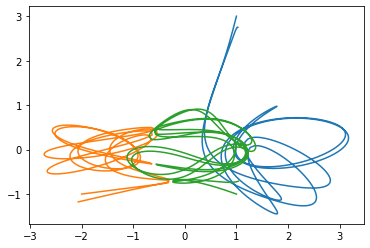

In [3]:
t_5 = np.arange(0, 5.0, 0.002)
y_5 = odeint(rhs, y_init, t_5)
for i in range(0, 2*n, 2):
    plt.plot(y_5[:, i], y_5[:, i+1])
plt.show()

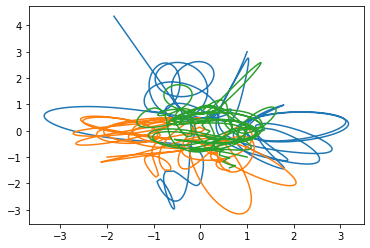

In [4]:
t_10 = np.arange(0, 10, 0.005)
y_10 = odeint(rhs, y_init, t_10)
for i in range(0, 2*n, 2):
    plt.plot(y_10[:, i], y_10[:, i+1])
plt.show()

___
## Homework 1.3.2 - Double Pendulum
![alt text](images/double-pendulum.png "Double Pendulum")

The equations of motion for the double pendulum are given by [from http://scienceworld.wolfram.com/physics/DoublePendulum.html]:

$$({m_1} + {m_2}){l_1}{{\ddot \theta }_1} + {m_2}{l_2}{{\ddot \theta }_2}\cos ({\theta _1} - {\theta _2}) + {m_2}{l_2}{({{\dot \theta }_2})^2}\sin ({\theta _1} - {\theta _2}) + ({m_1} + {m_2})g\sin {\theta _1} = 0$$

$${m_2}{l_2}{{\ddot \theta }_2} + {m_2}{l_1}{{\ddot \theta }_1}\cos ({\theta _1} - {\theta _2}) - {m_2}{l_1}{({{\dot \theta }_1})^2}\sin ({\theta _1} - {\theta _2}) + {m_2}g\sin {\theta _2} = 0$$

Given that $l_1 = 2$, $l_2 = 1$, $m_1 = 2$, $m_2 = 1$ and $g = 9.8$ $m/s^2$

The initial conditions at $t = 0$ are:

${{\theta }_1}(0) = 1.5$

${{\dot \theta }_1}(0) = 0$

${{\theta }_2}(0) = 3.0$

${{\dot \theta }_2}(0) = 0.0$

Write a program to plots the positions of the mass $m_2$ in $x-y$ coordinate over the time interval $0 \le t \le T\; s$. Where $T$ are:

a) 10

b) 100

$$
    ({m_1} + {m_2}){l_1}{{\ddot \theta }_1} + {m_2}{l_2}\cos ({\theta _1} - {\theta _2}){{\ddot \theta }_2} = - {m_2}{l_2}{({{\dot \theta }_2})^2}\sin ({\theta _1} - {\theta _2}) - ({m_1} + {m_2})g\sin {\theta _1}
$$
$$
    {m_2}{l_1}\cos ({\theta _1} - {\theta _2}){{\ddot \theta }_1} + {m_2}{l_2}{{\ddot \theta }_2} = {m_2}{l_1}{({{\dot \theta }_1})^2}\sin ({\theta _1} - {\theta _2}) - {m_2}g\sin {\theta _2}
$$

$$
\begin{equation*}
    \begin{bmatrix}
        ({m_1} + {m_2}){l_1} & {m_2}{l_2}\cos ({\theta _1} - {\theta _2}) \\
        {m_2}{l_1}\cos ({\theta _1} - {\theta _2}) & {m_2}{l_2}
    \end{bmatrix}
    \begin{bmatrix}
        {{\ddot \theta }_1} \\
        {{\ddot \theta }_2}
    \end{bmatrix}
    =
    \begin{bmatrix}
        - {m_2}{l_2}{({{\dot \theta }_2})^2}\sin ({\theta _1} - {\theta _2}) - ({m_1} + {m_2})g\sin {\theta _1} \\
        {m_2}{l_1}{({{\dot \theta }_1})^2}\sin ({\theta _1} - {\theta _2}) - {m_2}g\sin {\theta _2}
    \end{bmatrix}
\end{equation*}
$$

In [5]:
l_1 = 2
l_2 = 1
m_1 = 2
m_2 = 1
g = 9.8

y_init = [1.5, 0, 3.0, 0.0]

def rhs(y, t):
    theta_1 = y[0]
    theta_dot_1 = y[1]
    theta_2 = y[2]
    theta_dot_2 = y[3]
    A = np.array([[(m_1+m_2)*l_1, m_2*l_2*np.cos(theta_1-theta_2)], 
                  [m_2*l_1*np.cos(theta_1-theta_2), m_2*l_2]])
    b = np.array([-m_2*l_2*theta_dot_2**2*np.sin(theta_1-theta_2) - (m_1+m_2)*g*np.sin(theta_1), 
                  m_2*l_1*theta_dot_1**2*np.sin(theta_1-theta_2) - m_2*g*np.sin(theta_2)])
    theta_double_dot_1, theta_double_dot_2 = np.linalg.solve(A, b)
    return [theta_dot_1, theta_double_dot_1, theta_dot_2, theta_double_dot_2]

def find_pos(theta_1, theta_2):
    pos_x = l_1*np.sin(theta_1) + l_2*np.sin(theta_2)
    pos_y = - l_1*np.cos(theta_1) - l_2*np.cos(theta_2)
    return pos_x, pos_y

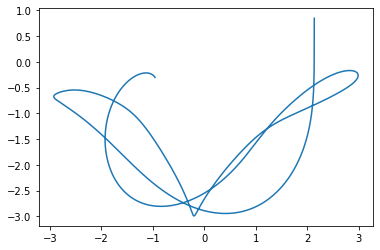

In [6]:
t_5 = np.arange(0, 5.0, 0.005)
y_5 = odeint(rhs, y_init, t_5)
pos_x_5, pos_y_5 = find_pos(y_5[:, 0], y_5[:, 2])
plt.plot(pos_x_5, pos_y_5)

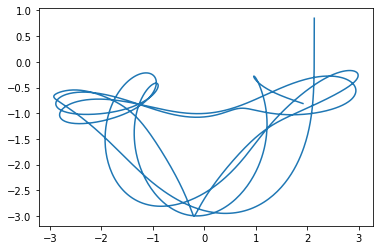

In [7]:
t_10 = np.arange(0, 10, 0.005)
y_10 = odeint(rhs, y_init, t_10)
pos_x_10, pos_y_10 = find_pos(y_10[:, 0], y_10[:, 2])
plt.plot(pos_x_10, pos_y_10)

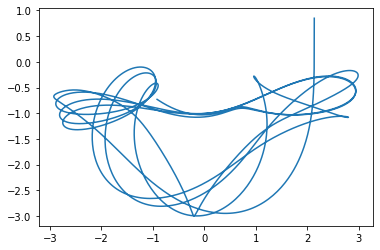

In [8]:
t_14 = np.arange(0, 14.0, 0.005)
y_14 = odeint(rhs, y_init, t_14)
pos_x_14, pos_y_14 = find_pos(y_14[:, 0], y_14[:, 2])
plt.plot(pos_x_14, pos_y_14)

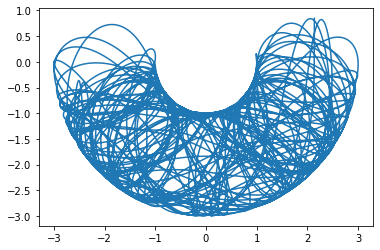

In [9]:
t_100 = np.arange(0, 100, 0.005)
y_100 = odeint(rhs, y_init, t_100)
pos_x_100, pos_y_100 = find_pos(y_100[:, 0], y_100[:, 2])
plt.plot(pos_x_100, pos_y_100)